In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_bbox(env_name, img, color):
    path_to_txt = os.path.join(env_name, 'labels')
    path_to_img = os.path.join(env_name, 'images')
    img_files = os.listdir(path_to_img)
    total_area = []
    for img_file in img_files:
        img_name = img_file.split('.')[0]
        text_file = img_name+'.txt'

        if not os.path.exists(os.path.join(path_to_txt, text_file)):
            continue
        with open(os.path.join(path_to_txt, text_file)) as f:
            line = f.readline()

        line = line.split(' ')
        x, y, w, h = float(line[1]), float(line[2]), float(line[3]), float(line[4])
        x1 = x-w/2
        y1 = y-h/2
        x2 = x+w/2
        y2 = y+h/2

        total_area.append(w*h)

        img_height, img_width = img.shape[0], img.shape[1]
        x1 = int(x1*img_width)
        x2 = int(x2*img_width)
        y1 = int(y1*img_height)
        y2 = int(y2*img_height)
        img = cv2.rectangle(img, (x1, y1), (x2, y2), color=color, thickness=5)
    # print('average area: %f'%(np.mean(total_area)))
    return img, total_area

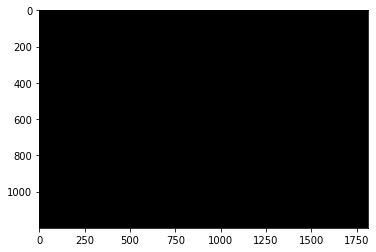

In [3]:
env = ['HUA', 'PAL_2021', 'PAL', 'RAN', 'TAK', 'LL']
# env = ['TAK']
colors = {'HUA': (255, 0, 255), 'PAL_2021':(255, 0, 0), 'PAL_2020':(0, 255, 0), 'PAL': (0, 255, 0), 'RAN': (255, 255, 0), 'TAK': (0, 255, 255), 'LL': (255, 0, 255)}
black_mat = np.zeros((1200, 1815, 3), dtype=np.uint8)
plt.imshow(black_mat)
plt.show()

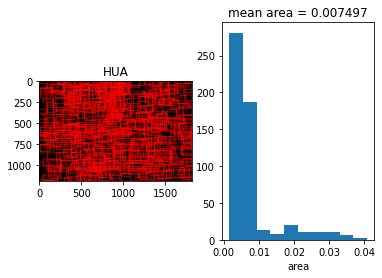

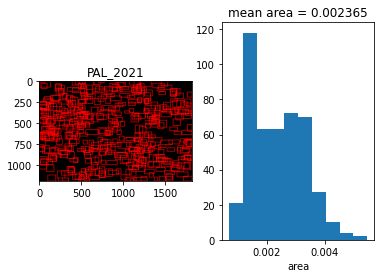

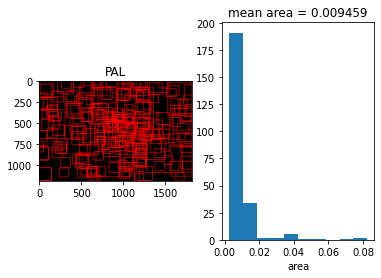

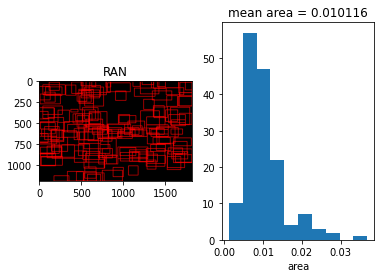

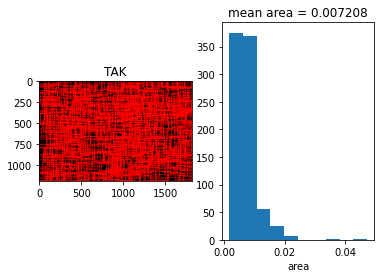

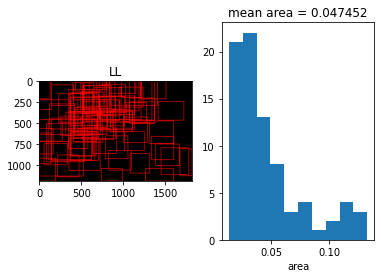

In [4]:
for env_name in env:
    # print(env_name)
    black_mat = np.zeros((1200, 1815, 3), dtype=np.uint8)
    curr_mat, area_distribution = draw_bbox(env_name, black_mat, (255,0,0))

    plt.subplot(1, 2, 1)
    plt.title(env_name)
    plt.imshow(curr_mat)
    plt.subplot(1, 2, 2)
    plt.hist(area_distribution)
    plt.xlabel('area')
    plt.title('mean area = %f'%(np.mean(area_distribution)))
    plt.show()